In [ ]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 1
CHANNELS = 3
n_classes = 31
EPOCHS = 100

In [ ]:
import os
import shutil

source_directories = os.listdir("/content/drive/MyDrive/Flipkart grid 6.0/Flipkart Grid/brand_classification/GroceryStoreDataset-master/dataset/train/Packages")


combined_dataset_path = '/content/drive/MyDrive/Flipkart grid 6.0/Flipkart Grid/brand_classification/GroceryStoreDataset-master/data'


if not os.path.exists(combined_dataset_path):
    os.makedirs(combined_dataset_path)


def move_images(src_dir):
    for class_folder in os.listdir(src_dir):
        class_path = os.path.join(src_dir, class_folder)
        if os.path.isdir(class_path):
            target_class_path = os.path.join(combined_dataset_path, class_folder)
            if not os.path.exists(target_class_path):
                os.makedirs(target_class_path)
            for image_file in os.listdir(class_path):
                src_image_path = os.path.join(class_path, image_file)
                if os.path.isfile(src_image_path):
                    shutil.move(src_image_path, target_class_path)


for src_dir in source_directories:
    move_images(f"/content/drive/MyDrive/Flipkart grid 6.0/Flipkart Grid/brand_classification/GroceryStoreDataset-master/dataset/train/Packages/{src_dir}")

print("Images have been consolidated into:", combined_dataset_path)


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Flipkart Grid/brand_classification/GroceryStoreDataset-master/data",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 864 files belonging to 31 classes.


In [ ]:
class_names = dataset.class_names
len(class_names)

31

In [ ]:
len(dataset)

864

In [ ]:
def get_dataset_partition_tf(ds, train_split=0.9, val_split=0.1, train_size=54, shuffle=True, shuffle_size=3):

    ds_size = len(ds)

    if shuffle:
        ds  = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [ ]:
print(len(train_ds), len(val_ds), len(test_ds))

777 86 1


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')

])

model.build(input_shape = (1,256,256,3))

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (1, 256, 256, 3)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (1, 256, 256, 3)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (1, 254, 254, 32)           │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (1, 127, 127, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (1, 125, 125, 32)           │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (1, 62, 62, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (1, 60, 60, 32)             │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (1, 30, 30, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (1, 28, 28, 32)             │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (1, 14, 14, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (1, 12, 12, 32)             │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (1, 6, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (1, 4, 4, 32)               │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (1, 2, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (1, 128)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (1, 64)                     │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (1, 31)                     │           2,015 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,407 (224.25 KB)

 Trainable params: 57,407 (224.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.0279 - loss: 3.4777 - val_accuracy: 0.0581 - val_loss: 3.3515
Epoch 2/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0499 - loss: 3.3326 - val_accuracy: 0.1860 - val_loss: 2.9489
Epoch 3/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1292 - loss: 2.9563 - val_accuracy: 0.2442 - val_loss: 2.4906
Epoch 4/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2058 - loss: 2.4399 - val_accuracy: 0.2093 - val_loss: 2.1696
Epoch 5/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2794 - loss: 2.2098 - val_accuracy: 0.3605 - val_loss: 1.8849
Epoch 6/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3237 - loss: 2.0385 - val_accuracy: 0.3140 - val_loss: 1.9660
Epoch 7/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3077 - loss: 2.0362 - val_accuracy: 0.4535 - val_loss: 1.7270
Epoch 8/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3847 - loss: 1.9433 - val_acc

In [ ]:
model.save('model.keras')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Flipkart Grid/brand_classification.keras')

first image to predict
actual label: Tropicana-Juice-Smooth
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
predicted label: Tropicana-Juice-Smooth


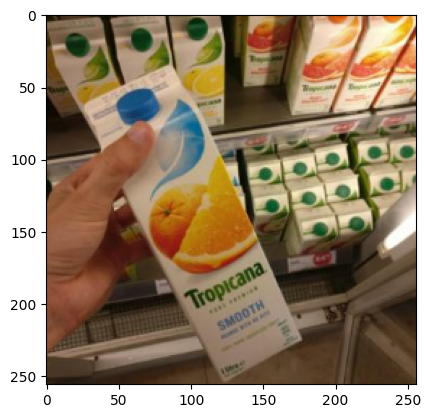

In [ ]:
import numpy as np
for images_batch, labels_batch in dataset.take(1):

  first_image = images_batch[0].numpy().astype('int')
  first_label = labels_batch[0].numpy()

  print('first image to predict')
  plt.imshow(first_image)
  print('actual label:', class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print('predicted label:', class_names[np.argmax(batch_prediction[0])])